# Project: Wrangling and Analyze Data

# Table of Contents
-  Introduction<br>
-  Data Wrangling<br>
    -  Data Gathering<br>
    -  Data Assessing<br>
    -  Data Cleaning<br>
-  Analyse Data<br>

## Introduction <br>

The aim of the project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. <br>

The dataset used for the analysis and visualisation is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage. <br>
This Twitter archive contains basic tweet data (tweet ID, timestamp, text, etc.) for 2356 of the 5000+ of their tweets as they stood on August 1, 2017. The Twitter archive data does not contain the retweet count and favourite count for each tweet and this has taken from another data file provided by Udacity. Also image predictions ﬁle from Udacity containing the predictions for dog breeds from three different resources based on the images from the tweets has also been used for the analysis.


In [1]:
# Import required packages
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from io import BytesIO
from PIL import Image

## Data Wrangling

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# 'twitter_archive_enhanced.csv' file is directly downloaded from Udacity website

# reading twitter_archive_enhanced.csv into the dataframe
df_tw_enh_csv = pd.read_csv('twitter-archive-enhanced.csv',sep=',')

In [3]:
df_tw_enh_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df_tw_enh_csv.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [5]:
df_tw_enh_csv.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# Request tsv file from the url (provided by Udacity) and check the request response
url_udacity = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url_udacity)
response

<Response [200]>

In [7]:
# extracting the tsv file name from url
file_name = url_udacity.split('/')[-1]
print(file_name)

image-predictions.tsv


In [8]:
# Write the response into tsv file
if not os.path.isfile(file_name):
    with open (file_name, mode='wb') as file:
        file.write(response.content)

In [9]:
# reading image-predictions.tsv into the dataframe
image_predic = pd.read_csv(file_name, sep='\t', encoding = 'utf-8')

In [10]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predic.sample(2)

tweet_id                                          jpg_url  \
963   705975130514706432  https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg   
1282  750383411068534784  https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg   

      img_num                         p1   p1_conf  p1_dog  \
963         1  Staffordshire_bullterrier  0.587764    True   
1282        1              Border_collie  0.672791    True   

                                  p2   p2_conf  p2_dog            p3  \
963   American_Staffordshire_terrier  0.281429    True  bull_mastiff   
1282                          collie  0.270188    True      papillon   

       p3_conf  p3_dog  
963   0.094798    True  
1282  0.034504    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Note: <br>
The code in the below cell has been taken from Udacity website (file name: 'twitter_api.py'), but when the executed the following error message dispalyed <br>
<br>
<br>
*Forbidden: 403 Forbidden <br>
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve*
<br>
<br>

# This cell has been marked as Markdown
# import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tw_enh_csv.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

The file 'tweet_json.txt' provided udacity has been directly used in this project

In [12]:
# Reference: Loading and parsing a JSON file with multiple JSON objects
# https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects

df_tweet_json = pd.read_json('tweet-json.txt',lines=True)

In [13]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [14]:
# Taking only the data from required columns 'id','retweet_count','favorite_count' to a new dataframe 
tweet_json = pd.DataFrame(data = df_tweet_json, columns = ['id','retweet_count','favorite_count'])

In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
tweet_json.to_csv('tweet_json_short.csv',index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Data Assessing
## Visually & Programatically

## twitter-archive-enhanced (Dataframe = df_tw_enh_csv)

In [17]:
df_tw_enh_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
type(df_tw_enh_csv.timestamp[100])

str

## Notes 1 (df_tw_enh_csv):
1) There are 181 redundant retweet rows 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' <br>
2) There are 78 redundant in_reply_to rows 'in_reply_to_status_id', 'in_reply_to_user_id' <br>
3) Incorrect data type for 'timestamp' (in string format) <br>
4) The column 'expanded_urls' has data only for 2297 rows (the remaining 59 rows (2356 - 2297 = 59) have no data)

In [19]:
df_tw_enh_csv.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [20]:
df_tw_enh_csv[df_tw_enh_csv['rating_denominator']!=10].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [21]:
df_tw_enh_csv['rating_numerator'].value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

## Notes 2 (df_tw_enh_csv):
1) There are 23 rows where the 'rating_denominator' is not equal to 10 <br>
2) 'rating_numerator' for some of the rows is very high (like 1776, 960 etc) and seems incorrect

In [22]:
sum(df_tw_enh_csv['source'].duplicated())

2352

In [23]:
df_tw_enh_csv.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [24]:
df_tw_enh_csv.tail(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [25]:
df_tw_enh_csv.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1193  717537687239008257                    NaN                  NaN   
1428  697616773278015490                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
631   794205286408003585                    NaN                  NaN   
851   765669560888528897                    NaN                  NaN   

                      timestamp  \
1193  2016-04-06 02:21:30 +0000   
1428  2016-02-11 03:02:54 +0000   
2259  2015-11-20 03:51:52 +0000   
631   2016-11-03 15:51:10 +0000   
851   2016-08-16 22:00:23 +0000   

                                                 source  \
1193  <a href="http://twitter.com/download/iphone" r...   
1428  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
631   <a href="http://twitter.com/download/iphone" r...   
851   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1193  People please. This is a Deadly Mediterranean ...                  NaN   
1428  This pupper doubles as a hallway rug. Very rar...                  NaN   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
631   This is Laika. She was a space pupper. The fir...                  NaN   
851   This is Tove. She's a Balsamic Poinsetter. Sur...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1193                       NaN                        NaN   
1428                       NaN                        NaN   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
631                        NaN                        NaN   
851                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1193  https://twitter.com/dog_rates/status/717537687...                11   
1428  https://twitter.com/dog_rates/status/697616773...                11   
2259  https://twitter.com/dogratingrating/status/667...                12   
631   https://twitter.com/dog_rates/status/794205286...                14   
851   https://twitter.com/dog_rates/status/765669560...                12   

      rating_denominator   name doggo floofer  pupper puppo  
1193                  10      a  None    None    None  None  
1428                  10   None  None    None  pupper  None  
2259                  10   None  None    None    None  None  
631                   10  Laika  None    None  pupper  None  
851                   10   Tove  None    None    None  None

In [26]:
df_tw_enh_csv.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

## Notes 3 (df_tw_enh_csv):
1) There are 745 rows name entered as 'None',  55 rows name entered as 'a' and 7 rows name entered as 'an'

## Image Predictions (Dataframe = image_predic)

In [27]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_predic.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [29]:
image_predic.tail(5)

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [30]:
sum(image_predic.duplicated())

0

In [31]:
image_predic['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [32]:
image_predic['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [33]:
image_predic['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [34]:
image_predic[(image_predic['p1_dog'] == False) & (image_predic['p2_dog'] == False) & (image_predic['p3_dog'] == False)].count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [35]:
image_predic[(image_predic['p1_dog'] == False) & (image_predic['p2_dog'] == False) & (image_predic['p3_dog'] == False)]

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                  ...                                                ...   
2021  880935762899988482    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022  881268444196462592    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

## Notes 4 (image_predic):
1) There are 2074 rows in image predictions, where are as the 'twitter-archive-enhanced' has 2356 rows, the data is missing for 2356 - 2074 = 282 rows <br>
2) There are total 324 rows where the the three predictions have not predicded a dog breed. <br>
3) Multiple columns contain the same type of data (columns p1, p2 and p3 contain the same type of data, columns p1_conf, p2_conf and p3_conf contain the same type of data and the columns p1_dog, p2_dog and p3_dog contain the same tupe of data)

## tweet_json (Dataframe = tweet_json)

In [36]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
sum(tweet_json.duplicated())

0

In [38]:
tweet_json.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [39]:
tweet_json.describe()

id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

## Notes 5 (tweet_json):
1) There are 2354 rows in tweet json data, where are as the 'twitter-archive-enhanced' has 2356 rows, the data is missing for 2356 - 2354 = 2 rows <br>

## Quality issues

#### Twitter archive data, csv_file = twitter_archive_enhanced.csv, dataframe = df_tw_enh_csv

1. There are 181 redundant retweet rows 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

2. There are 78 redundant in_reply_to rows 'in_reply_to_status_id', 'in_reply_to_user_id'

3. Incorrect data type for 'timestamp'

4. There are 23 rows where the 'rating_denominator' is not equal to 10

5. Dogs names entered as 'a' and 'an' instead of 'None'

6. 'rating_numerator' for some of the rows is very high and seems incorrect


#### Tweet image prediction, tsv_file = image_predictions.tsv, dataframe = image_predic

7. Missing data, there are 2074 rows in image predictions, where are as the 'twitter-archive-enhanced' has 2356 rows, the data is missing for 2356 - 2074 = 282 rows

8. There are total 324 rows where the the three predictions have not predicded a dog breed, this is a redundant data

## Tidiness issues

#### Twitter archive data, csv_file = twitter_archive_enhanced.csv, dataframe = df_tw_enh_csv

1. 4 columns 'doggo', 'floofer', 'pupper', 'puppo' for dog stages are not required and should be a single column stage
2. The information "retweet_count" and "favorite_count" 'tweet_json' is missing in the Twitter archive data (dataframe = 'df_tw_enh_csv') and this needs to be added to 'df_tw_enh_csv'

#### Tweet image prediction, tsv_file = image_predictions.tsv, dataframe = image_predic

3. Multiple columns contain the same type of data (columns p1, p2 and p3 contain the same type of data, columns p1_conf, p2_conf and p3_conf contain the same type of data and the columns p1_dog, p2_dog and p3_dog contain the same tupe of data)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## Data Cleaning

In [40]:
# Make copies of original pieces of data

tw_enh_csv_clean_df = df_tw_enh_csv.copy()
image_predic_clean_df = image_predic.copy()
tweet_json_clean_df = tweet_json.copy()

### Issue #1:

#### There are 4 columns for dog stages 'doggo', 'floofer', 'pupper', 'puppo'<br>
(Tidiness issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define:
The 4 columns 'doggo', 'floofer', 'pupper', 'puppo' to be converted to one single column 'stage' and drop these 4 columns

#### Code

In [41]:
# Merge multiple column values into one column in python pandas
# https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
tw_enh_csv_clean_df['stage'] = tw_enh_csv_clean_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis=1)

In [42]:
tw_enh_csv_clean_df['stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [43]:
# For the entries where there is no dog stage mentioned in all the 4 columns (mentioned as 'None' in all the 4 columns, replace the text as 'No-stage'
tw_enh_csv_clean_df['stage'].replace('NoneNoneNoneNone','No-stage',inplace=True)

In [44]:
tw_enh_csv_clean_df['stage'].value_counts()

No-stage                1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [45]:
# removing the text 'None' from 'stage' column
tw_enh_csv_clean_df['stage'] = tw_enh_csv_clean_df['stage'].map(lambda x: x.replace("None",""))

In [46]:
tw_enh_csv_clean_df['stage'].value_counts()

No-stage        1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [47]:
# For the rows where the dog stage is provided in more than one column, the dog stage is updated with 'Or'
tw_enh_csv_clean_df.loc[tw_enh_csv_clean_df.stage == 'doggopupper', 'stage'] = 'doggo or pupper'
tw_enh_csv_clean_df.loc[tw_enh_csv_clean_df.stage == 'doggopuppo', 'stage'] = 'doggo or puppo'
tw_enh_csv_clean_df.loc[tw_enh_csv_clean_df.stage == 'doggofloofer', 'stage'] = 'doggo or floofer'

In [48]:
tw_enh_csv_clean_df['stage'].value_counts()

No-stage            1976
pupper               245
doggo                 83
puppo                 29
doggo or pupper       12
floofer                9
doggo or puppo         1
doggo or floofer       1
Name: stage, dtype: int64

In [49]:
# drop the four 'doggo', 'floofer', 'pupper', 'puppo' coloumns
drop_columns_1=['doggo','floofer','pupper','puppo']
tw_enh_csv_clean_df = tw_enh_csv_clean_df.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [50]:
assert tw_enh_csv_clean_df.columns.any() not in drop_columns_1

In [51]:
tw_enh_csv_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

In [52]:
tw_enh_csv_clean_df.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
354   831262627380748289                    NaN                  NaN   
983   749395845976588288                    NaN                  NaN   
829   768909767477751808                    NaN                  NaN   
1812  676811746707918848                    NaN                  NaN   
1109  733828123016450049                    NaN                  NaN   

                      timestamp  \
354   2017-02-13 22:03:49 +0000   
983   2016-07-03 00:14:27 +0000   
829   2016-08-25 20:35:48 +0000   
1812  2015-12-15 17:11:09 +0000   
1109  2016-05-21 01:13:53 +0000   

                                                 source  \
354   <a href="http://twitter.com/download/iphone" r...   
983   <a href="http://twitter.com/download/iphone" r...   
829   <a href="http://twitter.com/download/iphone" r...   
1812  <a href="http://twitter.com/download/iphone" r...   
1109  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
354   This is Tucker. He's feeling h*ckin festive an...                  NaN   
983   This is George. He just remembered that bees a...                  NaN   
829   RT @dog_rates: When it's Janet from accounting...         7.001438e+17   
1812  Say hello to Penny &amp; Gizmo. They are pract...                  NaN   
1109  This is Terry. The harder you hug him the fart...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
354                        NaN                        NaN   
983                        NaN                        NaN   
829               4.196984e+09  2016-02-18 02:24:13 +0000   
1812                       NaN                        NaN   
1109                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
354   https://twitter.com/dog_rates/status/831262627...                12   
983   https://twitter.com/dog_rates/status/749395845...                10   
829   https://twitter.com/dog_rates/status/700143752...                10   
1812  https://twitter.com/dog_rates/status/676811746...                 9   
1109  https://twitter.com/dog_rates/status/733828123...                10   

      rating_denominator    name     stage  
354                   10  Tucker  No-stage  
983                   10  George  No-stage  
829                   10    None    pupper  
1812                  10   Penny  No-stage  
1109                  10   Terry  No-stage

### Issue #2:

#### Redundant retweet rows 
(Quality issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define
Drop all rows containing retweets where these columns will be non-null and then drop the retweet columns from the dataframe <br>
 
The retweet columns are 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'.

#### Code

In [53]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2356 

In [54]:
# updating the dataframe only with non empty rows of the column 'retweeted_status_id'
tw_enh_csv_clean_df = tw_enh_csv_clean_df[tw_enh_csv_clean_df.retweeted_status_id.isna()]

In [55]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  stage                       2175 

In [56]:
drop_columns_2 = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

In [57]:
tw_enh_csv_clean_df = tw_enh_csv_clean_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test

In [58]:
assert tw_enh_csv_clean_df.columns.any() not in drop_columns_2

In [59]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  stage                  2175 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


### Issue #3:

#### Redundant in_reply_to rows 
(Quality issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define
Find the index of in_reply_to rows and drop all rows containing in_reply_to where these columns will be non-null and then drop the in_reply_to columns from the dataframe <br>
The in_reply_to columns are 'in_reply_to_status_id', 'in_reply_to_user_id'

#### Code

In [60]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  stage                  2175 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [61]:
# Find the index of in_reply_to with non-null rows and drop these rows
in_reply_to_index = list(tw_enh_csv_clean_df[tw_enh_csv_clean_df["in_reply_to_status_id"].isnull()==False].index)

tw_enh_csv_clean_df.drop(axis=0, index=in_reply_to_index, inplace=True)

In [62]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   2097 non-null   object 
 10  stage                  2097 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 196.6+ KB


In [63]:
# drop the coloumns 'in_reply_to_status_id', 'in_reply_to_user_id'
drop_columns_3 = ['in_reply_to_status_id','in_reply_to_user_id']
tw_enh_csv_clean_df = tw_enh_csv_clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

#### Test

In [64]:
assert tw_enh_csv_clean_df.columns.any() not in drop_columns_3

In [65]:
for in_reply_to in drop_columns_3:
    if in_reply_to in list(tw_enh_csv_clean_df.index):
        print('Found a in_reply_to - non-null data')

In [66]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #4:

#### Missing data in 'expanded_urls' column 
(Quality issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define
Drop all rows with missing data in 'expanded_urls' coulmn

#### Code

In [67]:
# updating the dataframe only with non empty rows of the column 'expanded_urls'
tw_enh_csv_clean_df = tw_enh_csv_clean_df[tw_enh_csv_clean_df.expanded_urls.notnull()]

#### Test

In [68]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   stage               2094 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.6+ KB


### Issue #5:

#### 'rating_denominator' has to be 10 however some tweets have wrong values for 'rating_denominator' 
(Quality issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define
Drop all rows with 'rating_denominator' coulmn is not equal to 10

#### Code

In [69]:
tw_enh_csv_clean_df[tw_enh_csv_clean_df["rating_denominator"]!=10].count()

tweet_id              17
timestamp             17
source                17
text                  17
expanded_urls         17
rating_numerator      17
rating_denominator    17
name                  17
stage                 17
dtype: int64

In [70]:
# updating the dataframe only with rows where the column 'rating_denominator' is equal to 10
tw_enh_csv_clean_df = tw_enh_csv_clean_df[tw_enh_csv_clean_df.rating_denominator==10]

#### Test

In [71]:
tw_enh_csv_clean_df[tw_enh_csv_clean_df["rating_denominator"]!=10].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
stage                 0
dtype: int64

### Issue #6:

#### some tweets have suspiciously high 'rating_numerator' values
(Quality issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define
Cap the 'rating_numerator' to 30 an drop all rows with 'rating_numerator' coulmn is greater than 30

#### Code

In [72]:
tw_enh_csv_clean_df['rating_numerator'].value_counts()

12      485
10      434
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

In [73]:
rating_numerator_index = tw_enh_csv_clean_df.rating_numerator >= 30
tw_enh_csv_clean_df[rating_numerator_index].rating_numerator.value_counts()

75      1
1776    1
420     1
Name: rating_numerator, dtype: int64

In [74]:
# updating the dataframe only with rows where the column 'rating_numerator' is less than 30
tw_enh_csv_clean_df = tw_enh_csv_clean_df[tw_enh_csv_clean_df.rating_numerator<30]

#### Test

In [75]:
tw_enh_csv_clean_df['rating_numerator'].value_counts()

12    485
10    434
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
26      1
0       1
27      1
Name: rating_numerator, dtype: int64

### Issue #7:

#### Wrong data type for 'timestamp'
(Quality issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)

#### Define:
Change the 'timestamp' to datetime data type

#### Code:

In [76]:
tw_enh_csv_clean_df.timestamp = tw_enh_csv_clean_df.timestamp.astype('datetime64')

#### Test:

In [77]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2074 non-null   int64         
 1   timestamp           2074 non-null   datetime64[ns]
 2   source              2074 non-null   object        
 3   text                2074 non-null   object        
 4   expanded_urls       2074 non-null   object        
 5   rating_numerator    2074 non-null   int64         
 6   rating_denominator  2074 non-null   int64         
 7   name                2074 non-null   object        
 8   stage               2074 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 162.0+ KB


### Issue #8:

Twitter API additional data (dataframe = tweet_json_clean_df) should be part of Twitter archive data (dataframe = tw_enh_csv_clean_df) <br>
(Tidiness issue, Twitter archive data, dataframe = tw_enh_csv_clean_df) <br>
Twitter API additional data (dataframe = tweet_json_clean_df) has some missing information <br>
(Quality issue, Twitter API additional data (dataframe = tweet_json_clean_df) <br>

#### Define
Merge the 'retweet_count' and 'favorite_count' columns from 'tweet_json_clean_df' dataframe to 'tw_enh_csv_clean_df' and remove any rows with missing information and drop the redundant columns

#### Code:

In [78]:
tweet_json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [79]:
# Merge the two dataframes
tw_enh_csv_clean_df = pd.merge(tw_enh_csv_clean_df, tweet_json_clean_df, left_on = ['tweet_id'], right_on = ['id'], how = 'left')

In [80]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2074 non-null   int64         
 1   timestamp           2074 non-null   datetime64[ns]
 2   source              2074 non-null   object        
 3   text                2074 non-null   object        
 4   expanded_urls       2074 non-null   object        
 5   rating_numerator    2074 non-null   int64         
 6   rating_denominator  2074 non-null   int64         
 7   name                2074 non-null   object        
 8   stage               2074 non-null   object        
 9   id                  2074 non-null   int64         
 10  retweet_count       2074 non-null   int64         
 11  favorite_count      2074 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 210.6+ KB


Note: As the columns 'tweet_id' and 'id' are same, drop the column 'id' which is redundant

In [81]:
# drop the column 'id'
tw_enh_csv_clean_df = tw_enh_csv_clean_df.drop(['id'], axis = 1)

#### Test:

In [82]:
tw_enh_csv_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #9:

Tweet image prediction data (dataframe = image_predic_clean_df) should be part of Twitter archive data (dataframe = tw_enh_csv_clean_df) <br>
(Tidiness issue, Twitter archive data, dataframe = tw_enh_csv_clean_df) <br>
Tweet image prediction data (dataframe = image_predic_clean_df) has some missing information <br>
(Quality issue, Tweet image prediction data (dataframe = image_predic_clean_df) <br>

#### Define
Merge the 'image_predic_clean_df' dataframe to 'tw_enh_csv_clean_df' and remove any rows with missing information and drop the redundant columns

#### Code:

In [83]:
# merge the two dataframes
tw_enh_csv_clean_df = pd.merge(tw_enh_csv_clean_df, image_predic_clean_df, left_on=['tweet_id'] , right_on = ['tweet_id'], how='left')

In [84]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2074 non-null   int64         
 1   timestamp           2074 non-null   datetime64[ns]
 2   source              2074 non-null   object        
 3   text                2074 non-null   object        
 4   expanded_urls       2074 non-null   object        
 5   rating_numerator    2074 non-null   int64         
 6   rating_denominator  2074 non-null   int64         
 7   name                2074 non-null   object        
 8   stage               2074 non-null   object        
 9   retweet_count       2074 non-null   int64         
 10  favorite_count      2074 non-null   int64         
 11  jpg_url             1951 non-null   object        
 12  img_num             1951 non-null   float64       
 13  p1                  1951 non-null   object      

In [85]:
# drop the rows with missing data in the column 'jpg_url'
tw_enh_csv_clean_df = tw_enh_csv_clean_df[tw_enh_csv_clean_df.jpg_url.notnull()]

In [86]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 2073
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1951 non-null   int64         
 1   timestamp           1951 non-null   datetime64[ns]
 2   source              1951 non-null   object        
 3   text                1951 non-null   object        
 4   expanded_urls       1951 non-null   object        
 5   rating_numerator    1951 non-null   int64         
 6   rating_denominator  1951 non-null   int64         
 7   name                1951 non-null   object        
 8   stage               1951 non-null   object        
 9   retweet_count       1951 non-null   int64         
 10  favorite_count      1951 non-null   int64         
 11  jpg_url             1951 non-null   object        
 12  img_num             1951 non-null   float64       
 13  p1                  1951 non-null   object      

In [87]:
# drop the column 'img_num' as this is not an useful information
tw_enh_csv_clean_df = tw_enh_csv_clean_df.drop(['img_num'], axis = 1)

#### Test:

In [88]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 2073
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1951 non-null   int64         
 1   timestamp           1951 non-null   datetime64[ns]
 2   source              1951 non-null   object        
 3   text                1951 non-null   object        
 4   expanded_urls       1951 non-null   object        
 5   rating_numerator    1951 non-null   int64         
 6   rating_denominator  1951 non-null   int64         
 7   name                1951 non-null   object        
 8   stage               1951 non-null   object        
 9   retweet_count       1951 non-null   int64         
 10  favorite_count      1951 non-null   int64         
 11  jpg_url             1951 non-null   object        
 12  p1                  1951 non-null   object        
 13  p1_conf             1951 non-null   float64     

In [89]:
tw_enh_csv_clean_df.sample(5)

tweet_id           timestamp  \
307   826204788643753985 2017-01-30 23:05:46   
488   793150605191548928 2016-10-31 18:00:14   
1617  674805413498527744 2015-12-10 04:18:42   
1497  678798276842360832 2015-12-21 04:44:55   
590   776113305656188928 2016-09-14 17:40:06   

                                                 source  \
307   <a href="http://twitter.com/download/iphone" r...   
488   <a href="http://twitter.com/download/iphone" r...   
1617  <a href="http://twitter.com/download/iphone" r...   
1497  <a href="http://twitter.com/download/iphone" r...   
590   <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
307   Here's a little more info on Dew, your favorit...   
488   This is Nida. She's a free elf. Waited so long...   
1617  When your entire life is crumbling before you ...   
1497  This is Linda. She fucking hates trees. 7/10 h...   
590   This is Sampson. He's about to get hit with a ...   

                                          expanded_urls  rating_numerator  \
307   http://us.blastingnews.com/news/2017/01/kentuc...                13   
488   https://twitter.com/dog_rates/status/793150605...                11   
1617  https://twitter.com/dog_rates/status/674805413...                10   
1497  https://twitter.com/dog_rates/status/678798276...                 7   
590   https://twitter.com/dog_rates/status/776113305...                11   

      rating_denominator     name     stage  retweet_count  ...  \
307                   10     None     doggo           1075  ...   
488                   10     Nida  No-stage           1984  ...   
1617                  10     None  No-stage            391  ...   
1497                  10    Linda  No-stage           1350  ...   
590                   10  Sampson    pupper           5068  ...   

                                                jpg_url                  p1  \
307     https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg  Labrador_retriever   
488     https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg   Italian_greyhound   
1617  https://pbs.twimg.com/ext_tw_video_thumb/67480...    English_springer   
1497    https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg            Airedale   
590     https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg           mousetrap   

       p1_conf  p1_dog                p2   p2_conf  p2_dog  \
307   0.782058    True  golden_retriever  0.156581    True   
488   0.193869    True          bluetick  0.160380    True   
1617  0.594467    True    cocker_spaniel  0.389994    True   
1497  0.583122    True     silky_terrier  0.129567    True   
590   0.777468   False       black_widow  0.093940   False   

                               p3   p3_conf  p3_dog  
307   soft-coated_wheaten_terrier  0.007275    True  
488               standard_poodle  0.125982    True  
1617       Welsh_springer_spaniel  0.007096    True  
1497             Lakeland_terrier  0.094727    True  
590                   paddlewheel  0.017492   False  

[5 rows x 21 columns]

### Issue #10:

Multiple columns contain the same type of data (columns p1, p2 and p3 contain the same type of data, columns p1_conf, p2_conf and p3_conf contain the same type of data and the columns p1_dog, p2_dog and p3_dog contain the same type of data) <br>
(Tidiness issue, Twitter archive data, dataframe = tw_enh_csv_clean_df)


#### Define:
Create a single column 'Breed' covering the breed of the dog (from p1, p2, p3) and another coulmn 'Confidence' covering the highest confidence from p1_conf, p2_conf, p3_conf and drop the redundant coulmns

#### Code:

In [90]:
# Check if 'p1_conf' > 'p2_conf' > 'p3_conf'
tw_enh_csv_clean_df.query('p1_conf < p2_conf or p2_conf < p3_conf')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stage, retweet_count, favorite_count, jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 21 columns]

In [91]:
# create empty lists to the best prediction or nil prediction for each row in the dataset
breed = []
confidence = []

# loop through prediction columns to find the best prediction which is a breed of dog.
for i, row in tw_enh_csv_clean_df.iterrows(): 
    if (tw_enh_csv_clean_df.loc[i,'p1_dog'] == True):
        breed.append(tw_enh_csv_clean_df.loc[i,'p1'])
        confidence.append(tw_enh_csv_clean_df.loc[i,'p1_conf'])
    elif (tw_enh_csv_clean_df.loc[i,'p2_dog'] == True):
        breed.append(tw_enh_csv_clean_df.loc[i,'p2'])
        confidence.append(tw_enh_csv_clean_df.loc[i,'p2_conf'])
    elif (tw_enh_csv_clean_df.loc[i,'p3_dog'] == True):
        breed.append(tw_enh_csv_clean_df.loc[i,'p3'])
        confidence.append(tw_enh_csv_clean_df.loc[i,'p3_conf'])
    else:
        breed.append('No prediction')
        confidence.append(0)

In [92]:
# add lists created to the main dataframe
tw_enh_csv_clean_df['Breed'] = breed
tw_enh_csv_clean_df['Confidence'] = confidence

In [93]:
tw_enh_csv_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'Breed',
       'Confidence'],
      dtype='object')

In [94]:
tw_enh_csv_clean_df.sample(5)

tweet_id           timestamp  \
1544  676948236477857792 2015-12-16 02:13:31   
120   864873206498414592 2017-05-17 16:00:15   
365   816450570814898180 2017-01-04 01:05:59   
558   781251288990355457 2016-09-28 21:56:36   
1834  670449342516494336 2015-11-28 03:49:14   

                                                 source  \
1544  <a href="http://twitter.com/download/iphone" r...   
120   <a href="http://twitter.com/download/iphone" r...   
365   <a href="http://twitter.com/download/iphone" r...   
558   <a href="http://twitter.com/download/iphone" r...   
1834  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1544  This is Karl. Karl thinks he's slick. 6/10 sne...   
120   We only rate dogs. Please don't send in Jesus....   
365   Meet Moose. He doesn't want his friend to go b...   
558   This is Oakley. He just got yelled at for goin...   
1834  Vibrant dog here. Fabulous tail. Only 2 legs t...   

                                          expanded_urls  rating_numerator  \
1544  https://twitter.com/dog_rates/status/676948236...                 6   
120   https://twitter.com/dog_rates/status/864873206...                14   
365   https://twitter.com/dog_rates/status/816450570...                13   
558   https://twitter.com/dog_rates/status/781251288...                11   
1834  https://twitter.com/dog_rates/status/670449342...                 5   

      rating_denominator    name     stage  retweet_count  ...   p1_conf  \
1544                  10    Karl  No-stage            980  ...  0.611603   
120                   10    None  No-stage           9361  ...  0.478616   
365                   10   Moose  No-stage           9366  ...  0.352857   
558                   10  Oakley  No-stage           2458  ...  0.887771   
1834                  10    None  No-stage            729  ...  0.999924   

     p1_dog                  p2   p2_conf p2_dog               p3   p3_conf  \
1544  False             macaque  0.135176  False  squirrel_monkey  0.083247   
120   False            lakeside  0.114182  False            wreck  0.055926   
365   False            envelope  0.060107  False             nail  0.031291   
558    True   Italian_greyhound  0.030666   True        seat_belt  0.026730   
1834  False  European_gallinule  0.000030  False            agama  0.000022   

     p3_dog             Breed  Confidence  
1544  False     No prediction    0.000000  
120   False     No prediction    0.000000  
365   False     No prediction    0.000000  
558   False  Mexican_hairless    0.887771  
1834  False     No prediction    0.000000  

[5 rows x 23 columns]

In [95]:
# removing the columns that are not required
drop_columns_4 = ['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
tw_enh_csv_clean_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace=True)

#### Test:

In [96]:
# Check if the columns that are not required are dropped
assert tw_enh_csv_clean_df.columns.any() not in drop_columns_4

In [97]:
tw_enh_csv_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'Breed', 'Confidence'],
      dtype='object')

In [98]:
tw_enh_csv_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1951 non-null   int64         
 1   timestamp           1951 non-null   datetime64[ns]
 2   source              1951 non-null   object        
 3   text                1951 non-null   object        
 4   expanded_urls       1951 non-null   object        
 5   rating_numerator    1951 non-null   int64         
 6   rating_denominator  1951 non-null   int64         
 7   name                1951 non-null   object        
 8   stage               1951 non-null   object        
 9   retweet_count       1951 non-null   int64         
 10  favorite_count      1951 non-null   int64         
 11  jpg_url             1951 non-null   object        
 12  Breed               1951 non-null   object        
 13  Confidence          1951 non-null   float64     

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
tw_enh_csv_clean_df.to_csv('twitter_archive_master.csv',index=False)

In [100]:
df_new_tw_enh_csv_clean = pd.read_csv('twitter_archive_master.csv',parse_dates=['timestamp'],encoding='utf-8',infer_datetime_format=True)

In [101]:
df_new_tw_enh_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1951 non-null   int64         
 1   timestamp           1951 non-null   datetime64[ns]
 2   source              1951 non-null   object        
 3   text                1951 non-null   object        
 4   expanded_urls       1951 non-null   object        
 5   rating_numerator    1951 non-null   int64         
 6   rating_denominator  1951 non-null   int64         
 7   name                1951 non-null   object        
 8   stage               1951 non-null   object        
 9   retweet_count       1951 non-null   int64         
 10  favorite_count      1951 non-null   int64         
 11  jpg_url             1951 non-null   object        
 12  Breed               1951 non-null   object        
 13  Confidence          1951 non-null   float64     

## Analyse Data
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [102]:
# Some statistics of the data
df_new_tw_enh_csv_clean[['tweet_id','rating_numerator','retweet_count','favorite_count','Confidence']].describe()

tweet_id  rating_numerator  retweet_count  favorite_count  \
count  1.951000e+03       1951.000000    1951.000000     1951.000000   
mean   7.361904e+17         10.554587    2782.882112     8967.771912   
std    6.771202e+16          2.232848    4707.842318    12308.752377   
min    6.660209e+17          0.000000      16.000000       81.000000   
25%    6.758218e+17         10.000000     623.500000     1956.500000   
50%    7.087381e+17         11.000000    1360.000000     4144.000000   
75%    7.885890e+17         12.000000    3239.000000    11413.500000   
max    8.924206e+17         27.000000   79515.000000   132810.000000   

        Confidence  
count  1951.000000  
mean      0.465732  
std       0.339514  
min       0.000000  
25%       0.140538  
50%       0.460710  
75%       0.776138  
max       0.999956

#### Question 1: What are the top 10 most favourited tweets?

In [103]:
# Sort the values in descending order of 'favorite_count' and list the top 10
df_new_tw_enh_csv_clean[["tweet_id","rating_numerator","name","retweet_count","favorite_count"]].sort_values(by= 'favorite_count', axis = 0, ascending = False).head(10)

tweet_id  rating_numerator     name  retweet_count  \
306  822872901745569793                13     None          48265   
764  744234799360020481                13     None          79515   
58   879415818425184262                13  Duddles          45849   
395  807106840509214720                13  Stephan          56625   
108  866450705531457537                13   Jamesy          32883   
329  819004803107983360                14       Bo          42228   
93   870374049280663552                13     Zoey          27680   
397  806629075125202948                13     None          37911   
134  859196978902773760                12    quite          25661   
798  739238157791694849                13     None          52360   

     favorite_count  
306          132810  
764          131075  
58           107956  
395          107015  
108          106827  
329           95450  
93            85011  
397           75639  
134           75193  
798           75163

#### Question 2: What are the top 10 most retweeted tweets?

In [104]:
# Sort the values in descending order of 'retweet_count' and list the top 10
df_new_tw_enh_csv_clean[["tweet_id","rating_numerator","name","retweet_count","favorite_count"]].sort_values(by= 'retweet_count', axis = 0, ascending = False).head(10)

tweet_id  rating_numerator     name  retweet_count  \
764   744234799360020481                13     None          79515   
395   807106840509214720                13  Stephan          56625   
798   739238157791694849                13     None          52360   
306   822872901745569793                13     None          48265   
58    879415818425184262                13  Duddles          45849   
329   819004803107983360                14       Bo          42228   
397   806629075125202948                13     None          37911   
630   761672994376806400                10     None          33421   
108   866450705531457537                13   Jamesy          32883   
1450  676219687039057920                10  Kenneth          31989   

      favorite_count  
764           131075  
395           107015  
798            75163  
306           132810  
58            107956  
329            95450  
397            75639  
630            55016  
108           106827  
1450           67100

#### Question 3: What is the relationship between the ratings by WeRateDogs and retweet count and favorite count?

<AxesSubplot:xlabel='rating_numerator', ylabel='favorite_count'>

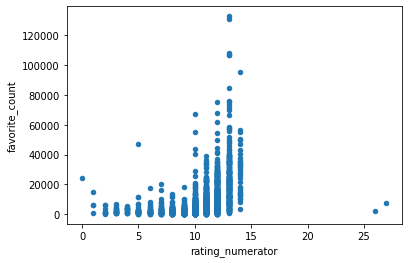

In [105]:
df_new_tw_enh_csv_clean.plot(x = 'rating_numerator' ,y = 'favorite_count', kind = 'scatter')

<AxesSubplot:xlabel='rating_numerator', ylabel='retweet_count'>

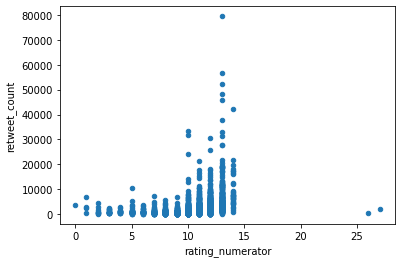

In [106]:
df_new_tw_enh_csv_clean.plot(x = 'rating_numerator' ,y = 'retweet_count', kind = 'scatter')

Insight: There is no clear and direct relation between dogs ratings by WeRateDogs Vs Favorite and Retweet count (i.e. the dogs with highest rating does not necessarily have highest favourite or retweet count). In general the dogs with rating 14 (which is close to the highest rating of 15, excluding the outliers) have the highest favourite and retweet count.

#### Question 4: Which stage of dogs got the highest average rating, retweet counts and favorite counts?

In [107]:
# Taking the rows only with dog stages provided
df_stage = df_new_tw_enh_csv_clean[df_new_tw_enh_csv_clean["stage"]!='No-stage']

In [108]:
by_stages = df_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')

<AxesSubplot:title={'center':'Total favorite counts by stages of dogs'}, xlabel='stages'>

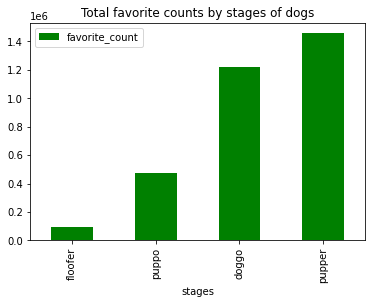

In [109]:
df_stage = df_new_tw_enh_csv_clean.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
df_total_favorite_counts_by_stages = pd.DataFrame(df_stage.groupby('stage').favorite_count.sum().sort_values())
df_total_favorite_counts_by_stages['stages'] = df_total_favorite_counts_by_stages.index
df_total_favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='bar',title="Total favorite counts by stages of dogs",color='g')

<AxesSubplot:title={'center':'Total retweet counts by stages of dogs'}, xlabel='stages'>

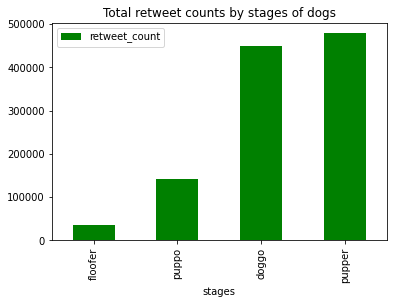

In [110]:
df_total_retweet_counts_by_stages = pd.DataFrame(df_stage.groupby('stage').retweet_count.sum().sort_values())
df_total_retweet_counts_by_stages['stages'] = df_total_favorite_counts_by_stages.index
df_total_retweet_counts_by_stages.plot(x="stages",y='retweet_count',kind='bar',title="Total retweet counts by stages of dogs",color='g')

<AxesSubplot:title={'center':'Average rating by stage'}, xlabel='stages'>

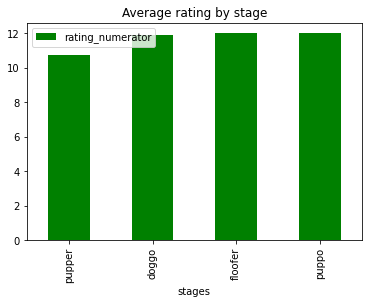

In [111]:
df_avg_rating_numerator_by_stages = pd.DataFrame(df_stage.groupby('stage').rating_numerator.mean().sort_values())
df_avg_rating_numerator_by_stages['stages'] = df_avg_rating_numerator_by_stages.index
df_avg_rating_numerator_by_stages.plot(x="stages",y='rating_numerator',kind='bar',title="Average rating by stage",color='g')

#### Insight:
The dog stage 'Pupper' has got the highest favorite and retweet counts the average rating of the dog stage 'Pupper' is slightly lower than the remaining 3 dog stages

#### Question 5: What are the top 30 most tweeted dog breeds by WeRateDogs?

In [112]:
# unselcting the rows with no Breed prediction
df_30_most_tweeted_dogs = df_new_tw_enh_csv_clean.query('Breed ! = "No prediction"')

In [113]:
# Group by `Breed` and taking the count of favorite_count, sort it in descending order and select top 30
response = df_30_most_tweeted_dogs.groupby('Breed').count().favorite_count.sort_values(ascending=True).nlargest(30)
response

Breed
golden_retriever                  153
Labrador_retriever                103
Pembroke                           94
Chihuahua                          89
pug                                62
toy_poodle                         50
chow                               47
Samoyed                            42
Pomeranian                         40
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
beagle                             20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Siberian_husky                     19
Shetland_sheepdog                  18
Maltese_dog                        18
Rottweiler                         18
Lakeland_terrier                   17
Italian_greyhound                  17
kuvasz

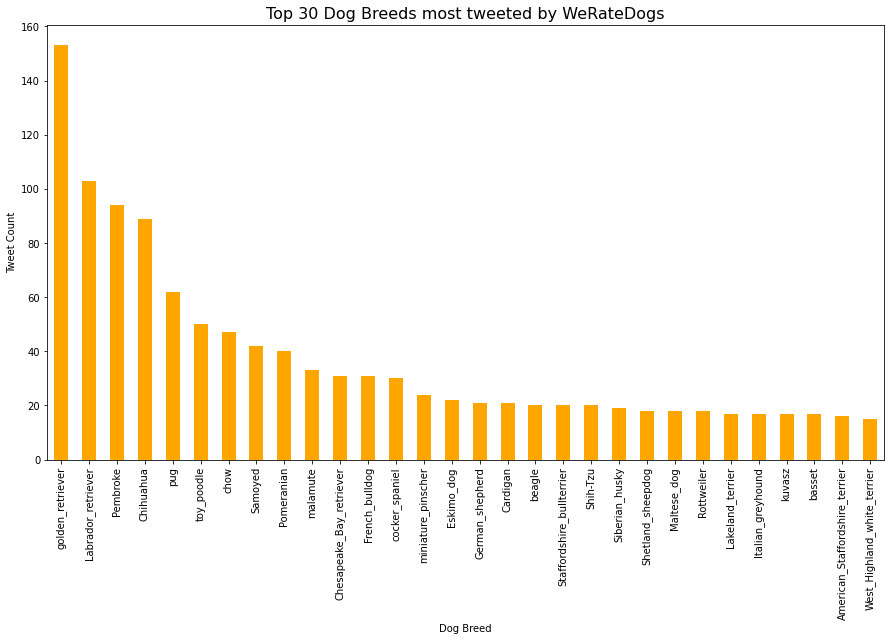

In [114]:
plt.figure(figsize=(15,8))
response.plot(kind='bar', color=['orange'])
plt.title('Top 30 Dog Breeds most tweeted by WeRateDogs', fontsize=16)
plt.xlabel('Dog Breed')
plt.ylabel('Tweet Count');

#### Insight:
golden_retriver is the most popular dog breed tweeted by WeRateDogs.

#### Question 6: What are the top 10 dog breeds with overall highest 'favorite_count'?

In [115]:
# Group by `Breed` and taking the count of favorite_count, sort it in descending order and select top 30
response = df_30_most_tweeted_dogs.groupby('Breed').sum().favorite_count.sort_values(ascending=True).nlargest(10)
response

Breed
golden_retriever      1914145
Labrador_retriever    1253364
Pembroke              1038797
Chihuahua              717450
Samoyed                583906
French_bulldog         570921
chow                   443610
cocker_spaniel         407412
pug                    383817
toy_poodle             337270
Name: favorite_count, dtype: int64

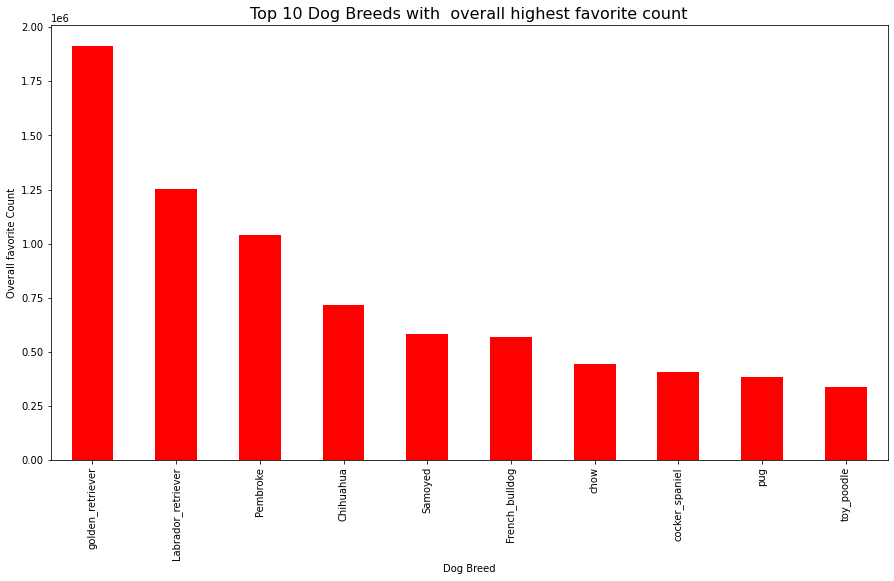

In [116]:
plt.figure(figsize=(15,8))
response.plot(kind='bar', color=['red'])
plt.title('Top 10 Dog Breeds with  overall highest favorite count', fontsize=16)
plt.xlabel('Dog Breed')
plt.ylabel('Overall favorite Count');

#### Question 7: Which are the top 5 dogs of the breed 'Golden Retriever' with highest 'favorite_count'?

In [117]:
df_golden_retriever = df_new_tw_enh_csv_clean.query('Breed == "golden_retriever"')

In [118]:
df_golden_retriever.sort_values(by = 'favorite_count', ascending = False, inplace = True)

C:\Users\pradeep\AppData\Local\Temp\ipykernel_9508\2371614025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_golden_retriever.sort_values(by = 'favorite_count', ascending = False, inplace = True)


In [119]:
df_golden_retriever.head(5)

tweet_id           timestamp  \
93   870374049280663552 2017-06-01 20:18:38   
444  795464331001561088 2016-11-07 03:14:10   
183  846514051647705089 2017-03-28 00:07:32   
39   883482846933004288 2017-07-08 00:28:19   
45   882268110199369728 2017-07-04 16:01:23   

                                                source  \
93   <a href="http://twitter.com/download/iphone" r...   
444  <a href="http://twitter.com/download/iphone" r...   
183  <a href="http://twitter.com/download/iphone" r...   
39   <a href="http://twitter.com/download/iphone" r...   
45   <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
93   This is Zoey. She really likes the planet. Wou...   
444  Elder doggo does a splash. Both 13/10 incredib...   
183  This is Barney. He's an elder doggo. Hitches a...   
39   This is Bella. She hopes her smile made you sm...   
45   This is Alfy. You're witnessing his first wate...   

                                         expanded_urls  rating_numerator  \
93   https://twitter.com/dog_rates/status/870374049...                13   
444  https://twitter.com/dog_rates/status/795464331...                13   
183  https://twitter.com/dog_rates/status/846514051...                13   
39   https://twitter.com/dog_rates/status/883482846...                 5   
45   https://twitter.com/dog_rates/status/882268110...                13   

     rating_denominator    name     stage  retweet_count  favorite_count  \
93                   10    Zoey  No-stage          27680           85011   
444                  10    None     doggo          27728           55683   
183                  10  Barney     doggo          13076           48410   
39                   10   Bella  No-stage          10407           46860   
45                   10    Alfy  No-stage          12118           45880   

                                               jpg_url             Breed  \
93     https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg  golden_retriever   
444  https://pbs.twimg.com/ext_tw_video_thumb/79546...  golden_retriever   
183    https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg  golden_retriever   
39     https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg  golden_retriever   
45     https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg  golden_retriever   

     Confidence  
93     0.841001  
444    0.193082  
183    0.650003  
39     0.943082  
45     0.762211

favorite_count =  85011


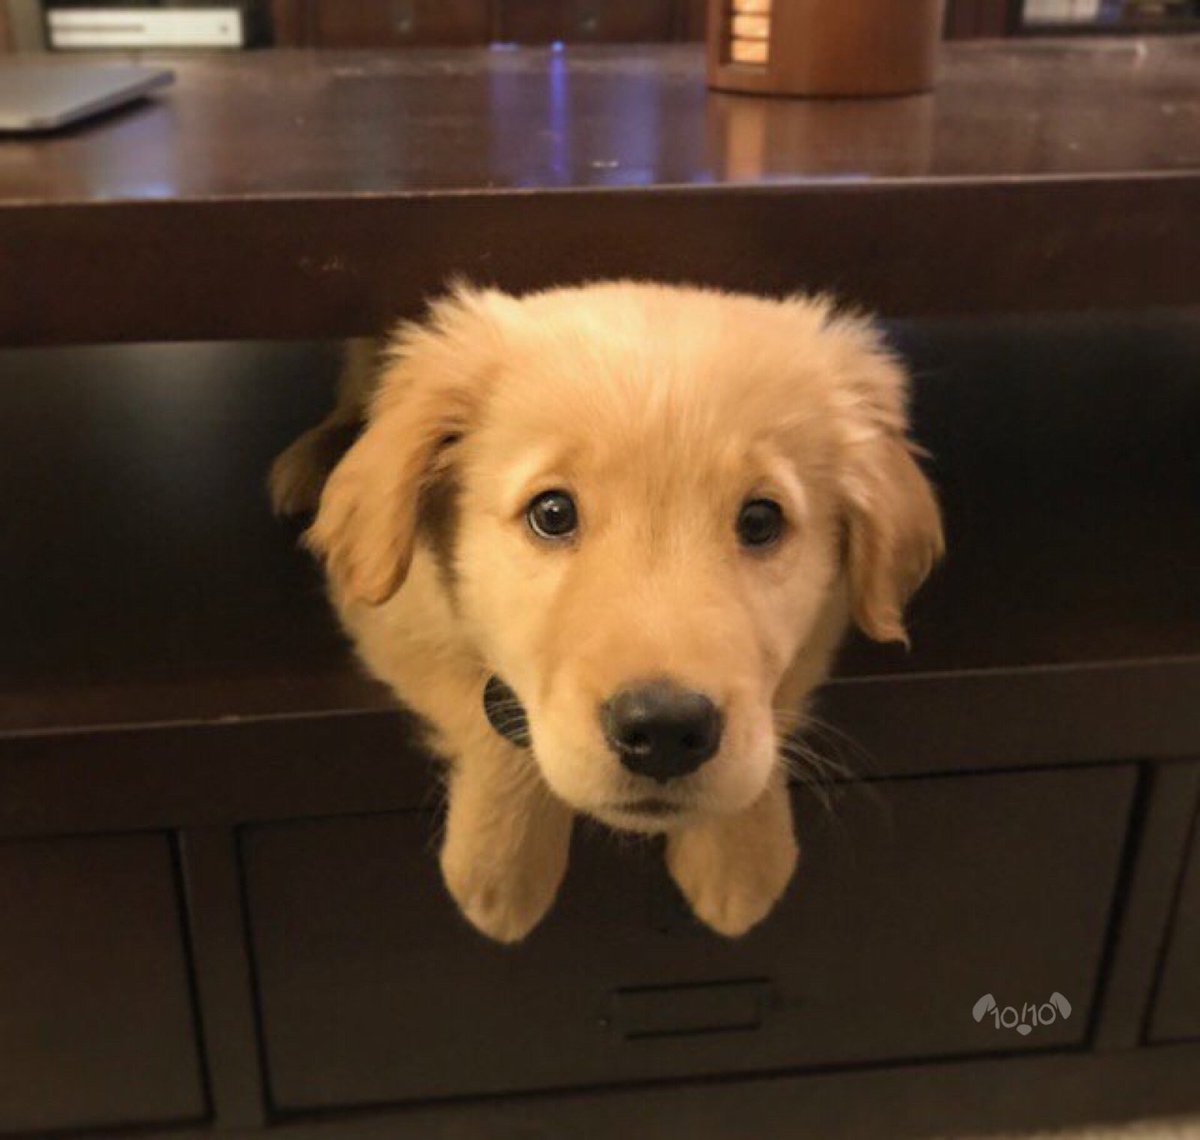

In [120]:
fav_count = df_golden_retriever.favorite_count.iloc[0]
print ("favorite_count = ",fav_count)
url = df_golden_retriever.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

favorite_count =  55683


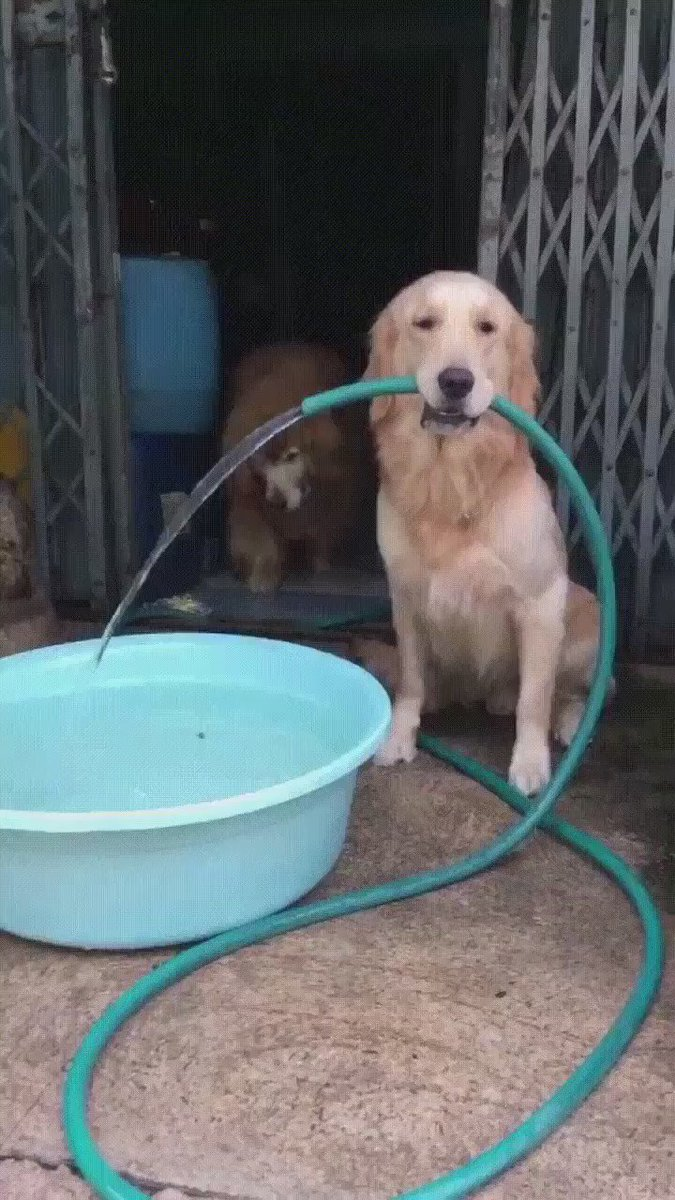

In [121]:
fav_count = df_golden_retriever.favorite_count.iloc[1]
print ("favorite_count = ",fav_count)
url = df_golden_retriever.jpg_url.iloc[1]
r = requests.get(url)
Image.open(BytesIO(r.content))

favorite_count =  48410


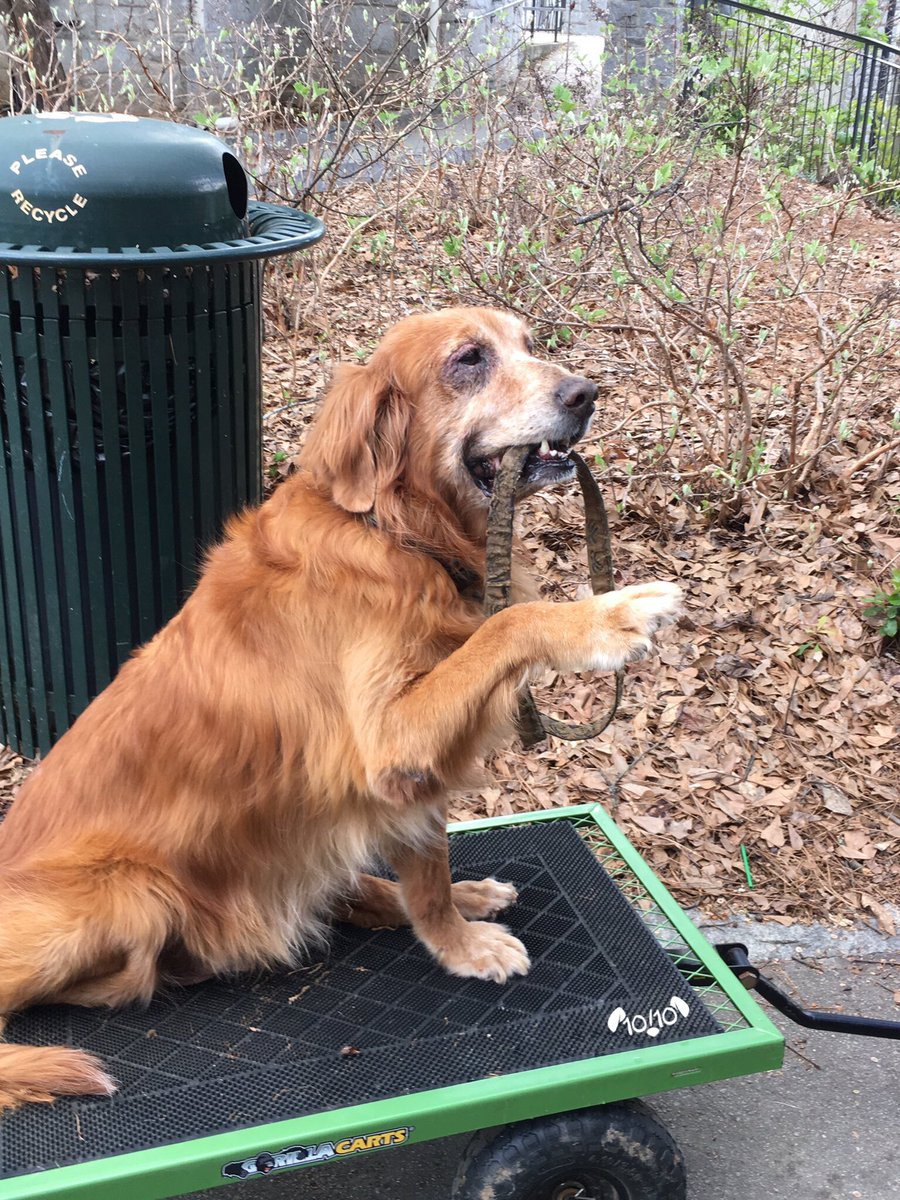

In [122]:
fav_count = df_golden_retriever.favorite_count.iloc[2]
print ("favorite_count = ",fav_count)
url = df_golden_retriever.jpg_url.iloc[2]
r = requests.get(url)
Image.open(BytesIO(r.content))

favorite_count =  46860


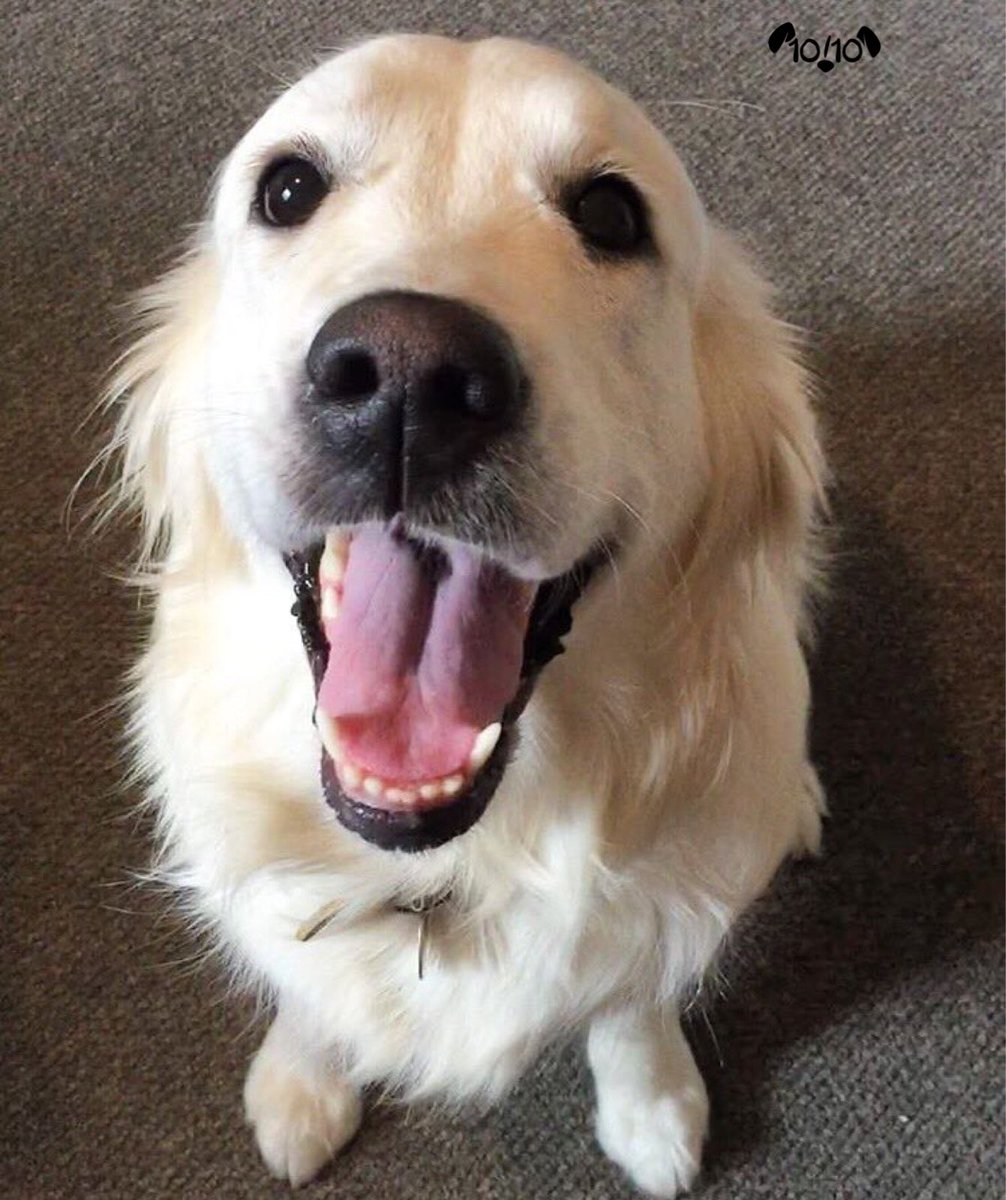

In [123]:
fav_count = df_golden_retriever.favorite_count.iloc[3]
print ("favorite_count = ",fav_count)
url = df_golden_retriever.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

favorite_count =  45880


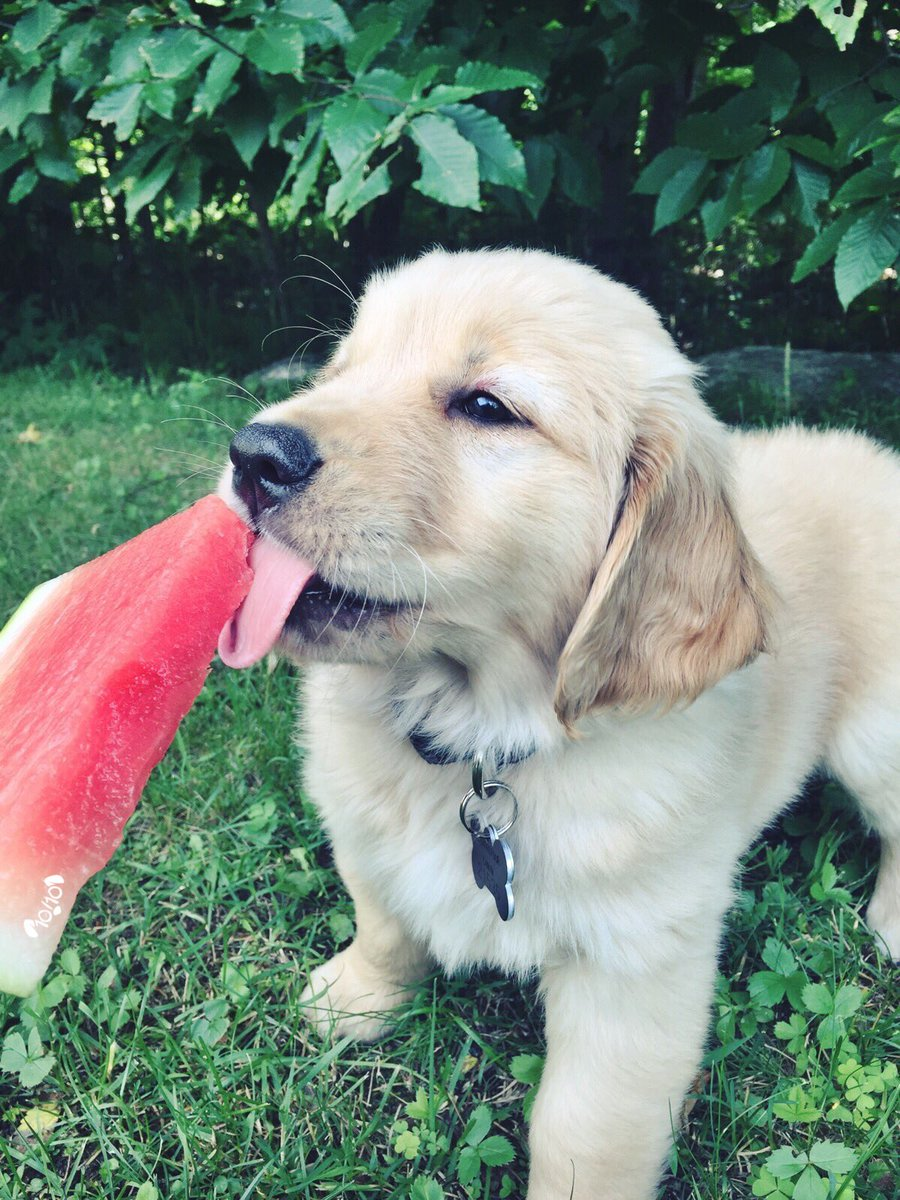

In [124]:
fav_count = df_golden_retriever.favorite_count.iloc[4]
print ("favorite_count = ",fav_count)
url = df_golden_retriever.jpg_url.iloc[4]
r = requests.get(url)
Image.open(BytesIO(r.content))

#### Question 8: What are the top 10 dogs with lowest rating?

In [125]:
df_dog_rating = df_new_tw_enh_csv_clean.groupby('Breed').count()

In [126]:
df_dog_rating

tweet_id  timestamp  source  text  \
Breed                                                               
Afghan_hound                           3          3       3     3   
Airedale                              12         12      12    12   
American_Staffordshire_terrier        16         16      16    16   
Appenzeller                            2          2       2     2   
Australian_terrier                     2          2       2     2   
...                                  ...        ...     ...   ...   
toy_poodle                            50         50      50    50   
toy_terrier                            3          3       3     3   
vizsla                                13         13      13    13   
whippet                               11         11      11    11   
wire-haired_fox_terrier                2          2       2     2   

                                expanded_urls  rating_numerator  \
Breed                                                             
Afghan_hound                                3                 3   
Airedale                                   12                12   
American_Staffordshire_terrier             16                16   
Appenzeller                                 2                 2   
Australian_terrier                          2                 2   
...                                       ...               ...   
toy_poodle                                 50                50   
toy_terrier                                 3                 3   
vizsla                                     13                13   
whippet                                    11                11   
wire-haired_fox_terrier                     2                 2   

                                rating_denominator  name  stage  \
Breed                                                             
Afghan_hound                                     3     3      3   
Airedale                                        12    12     12   
American_Staffordshire_terrier                  16    16     16   
Appenzeller                                      2     2      2   
Australian_terrier                               2     2      2   
...                                            ...   ...    ...   
toy_poodle                                      50    50     50   
toy_terrier                                      3     3      3   
vizsla                                          13    13     13   
whippet                                         11    11     11   
wire-haired_fox_terrier                          2     2      2   

                                retweet_count  favorite_count  jpg_url  \
Breed                                                                    
Afghan_hound                                3               3        3   
Airedale                                   12              12       12   
American_Staffordshire_terrier             16              16       16   
Appenzeller                                 2               2        2   
Australian_terrier                          2               2        2   
...                                       ...             ...      ...   
toy_poodle                                 50              50       50   
toy_terrier                                 3               3        3   
vizsla                                     13              13       13   
whippet                                    11              11       11   
wire-haired_fox_terrier                     2               2        2   

                                Confidence  
Breed                                       
Afghan_hound                             3  
Airedale                                12  
American_Staffordshire_terrier          16  
Appenzeller                              2  
Australian_terrier                       2  
...                                    ...  
toy_poodle                              50  
toy_terrier           

In [127]:
df_dog_rating['rating_numerator'].sort_values().head(10)

Breed
Bouvier_des_Flandres       1
Irish_wolfhound            1
standard_schnauzer         1
Japanese_spaniel           1
Scotch_terrier             1
silky_terrier              1
EntleBucher                1
clumber                    1
Sussex_spaniel             2
black-and-tan_coonhound    2
Name: rating_numerator, dtype: int64

In [128]:
(df_dog_rating[df_dog_rating['rating_numerator'] < 10]).count()

#(df_new_tw_enh_csv_clean[df_new_tw_enh_csv_clean['rating_numerator'] < 10]).count()

tweet_id              61
timestamp             61
source                61
text                  61
expanded_urls         61
rating_numerator      61
rating_denominator    61
name                  61
stage                 61
retweet_count         61
favorite_count        61
jpg_url               61
Confidence            61
dtype: int64

#### Insight:
There are several dog breeds with rating '1' and 61 do breeds with rating less than 10